In [62]:
import pandas as pd
import numpy as np
import json

# Load train_titles.csv and test_titles.csv
train_titles = pd.read_csv('train_titles.csv')
test_titles = pd.read_csv('test_titles.csv')




In [41]:
# Check for missing data in each dataset
print(train_titles.isnull().sum())


# If there are missing values, we can choose to drop or impute them based on the column and data characteristics.
# For example, to drop rows with missing values:
train_titles.dropna(inplace=True)



train_idx                   0
id                          0
title                       0
type                        0
description                33
release_year                0
age_certification        7899
runtime                     0
genres                      0
production_countries        0
seasons                 12123
streaming                   0
imdb_votes                  0
imdb_score                  0
target                      0
dtype: int64


In [42]:
# Handling missing values in 'description'
train_titles.dropna(subset=['description'], inplace=True)

# Handling missing values in 'age_certification'
train_titles['age_certification'].fillna(train_titles['age_certification'].mode()[0], inplace=True)

# Handling missing values in 'seasons'
train_titles['seasons'].fillna(0, inplace=True)




# Feature Selection: We may choose to select relevant features from this dataset and the 'train_credits' dataset if needed.

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Select the feature columns (excluding the target variable 'target')
feature_columns = ['release_year', 'runtime', 'imdb_votes']


X_train = train_titles[feature_columns]
y_train = train_titles['target']

# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)

# Select the top N features (e.g., N=3)
top_n_features = 3
selected_features = feature_importance_df['Feature'][:top_n_features].tolist()

# Use the selected features for training the model
X_train_selected = X_train[selected_features]


        Feature  Importance
2    imdb_votes    0.535368
1       runtime    0.285583
0  release_year    0.179050


# Model selection

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


X_train_selected = train_titles[['imdb_votes', 'runtime', 'release_year']]
y_train = train_titles['target']

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Networks': MLPClassifier()
}

# Initialize cross-validation
cv = 5  # Number of cross-validation folds

# Perform cross-validation and calculate F1 scores for each model
for name, model in models.items():
    f1_scorer = make_scorer(f1_score, average='weighted')
    f1_scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring=f1_scorer)
    mean_f1_score = f1_scores.mean()
    print(f'{name} Mean F1 Score: {mean_f1_score:.4f}')


C:\Users\zilie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zilie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zilie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Logistic Regression Mean F1 Score: 0.2730
Decision Tree Mean F1 Score: 0.3749
Random Forest Mean F1 Score: 0.4270


C:\Users\zilie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


XGBoost Mean F1 Score: 0.4152


C:\Users\zilie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


SVM Mean F1 Score: 0.2828
KNN Mean F1 Score: 0.3506


C:\Users\zilie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zilie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\zilie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

Neural Networks Mean F1 Score: 0.2555


# TEST DATA processing

In [45]:

# Load the preprocessed test_titles.csv
test_titles = pd.read_csv('test_titles.csv')

test_titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1507 non-null   object 
 1   title                 1507 non-null   object 
 2   type                  1507 non-null   object 
 3   description           1499 non-null   object 
 4   release_year          1507 non-null   int64  
 5   age_certification     520 non-null    object 
 6   runtime               1507 non-null   int64  
 7   genres                1507 non-null   object 
 8   production_countries  1507 non-null   object 
 9   seasons               298 non-null    float64
 10  imdb_votes            1507 non-null   int64  
 11  streaming             1507 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 141.4+ KB


## Preprocess test_data

In [46]:
# Fill missing values in 'description' column with an empty string
test_titles['description'].fillna('', inplace=True)

# Fill missing values in 'age_certification' column with a default value
test_titles['age_certification'].fillna('Not Rated', inplace=True)

# Fill missing values in 'seasons' column with 0 (assuming missing values mean the entry is not a TV show)
test_titles['seasons'].fillna(0, inplace=True)


In [47]:
from sklearn.preprocessing import MinMaxScaler
# Step 2: Encoding Categorical Variables
test_titles = pd.get_dummies(test_titles, columns=['type', 'age_certification', 'genres', 'production_countries', 'streaming'], drop_first=True)

# Step 3: Separating Target and Features
# If you don't have a target column, simply drop it to get the features (X_test)
X_test = test_titles.drop(['id', 'title', 'description'], axis=1)

# Step 4: Scaling Numerical Features
scaler = MinMaxScaler()
numerical_features = ['release_year', 'runtime', 'seasons', 'imdb_votes']
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])


# Model Evaluation

In [51]:
# Assuming 'X_test_selected' is the preprocessed test feature matrix with multiple columns
# And you want to keep only the columns 'imdb_votes', 'runtime', and 'release_year'

# Select the desired columns from X_test_selected
X_test_selected = X_test[['imdb_votes', 'runtime', 'release_year']]


In [59]:
# Assuming 'X_train_selected' and 'y_train' are the preprocessed feature matrix and target vector.
# Assuming 'X_test' is the preprocessed test feature matrix.

# Create the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1
)

# Perform cross-validation on the entire training data to get an estimate of model performance
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=5, scoring='f1_weighted')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean Cross-Validation F1 Score:", cv_scores.mean())

# Train the model on the entire training data
best_rf_model.fit(X_train_selected, y_train)

# # Check and align columns in X_test with X_train_selected
# X_test = X_test.reindex(columns=X_train_selected.columns, fill_value=0)

# Make predictions on the test data
y_pred_test = best_rf_model.predict(X_test_selected)

# Save the predictions to a new CSV file
test_titles['predicted_target'] = y_pred_test
test_titles.to_csv('test_titles_predictions.csv', index=False)


C:\Users\zilie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Scores: [0.43066525 0.44543295 0.42125785 0.44085543 0.41696085]
Mean Cross-Validation F1 Score: 0.4310344658591342


# Save the predictions to a new CSV file (if desired):

In [63]:

# Generate predictions 
test_titles['predicted_target'] = y_pred_test

# Convert predictions to dict format 
targets = test_titles['predicted_target'].to_dict()

# Structure as needed
targets = {'target': targets}

# Save to JSON 
json_data = json.dumps(targets)

with open('predictions.json', 'w') as f:
    f.write(json_data)

# Something is wrong?!?!?

In [55]:
# Assuming 'y_train' is the target vector of the training data
class_counts = y_train.value_counts()
print(class_counts)


6    1412
5     943
7     735
4     337
3     100
2      33
8      32
1      14
0       3
Name: target, dtype: int64


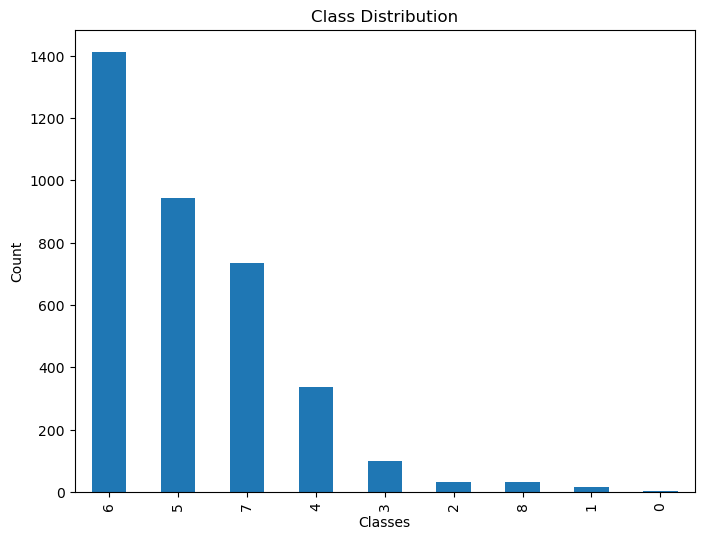

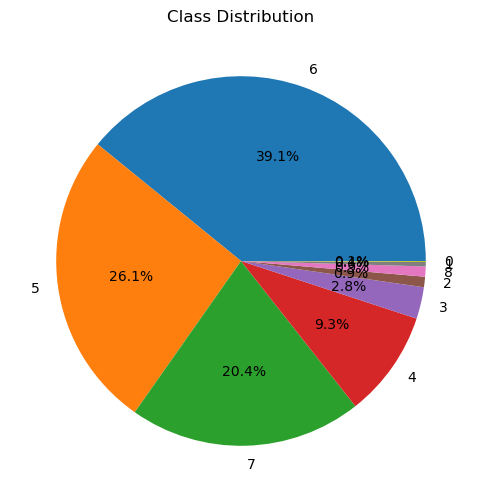

In [56]:
import matplotlib.pyplot as plt

# Plot a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Alternatively, we can use a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


In [57]:
# Calculate the class imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print("Class Imbalance Ratio:", imbalance_ratio)


Class Imbalance Ratio: 470.6666666666667


# This Ratio is not normal. We need to proceed of checking the data.